# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, we will focus on visualizing data using bar chat.


## Objectives


In this lab we will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Import the needed libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [16]:
#as we already have data in our folder so we can directly read into it.

# Load the data
df = pd.read_csv("survey_data.csv")

# Display the first few rows to understand the structure of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



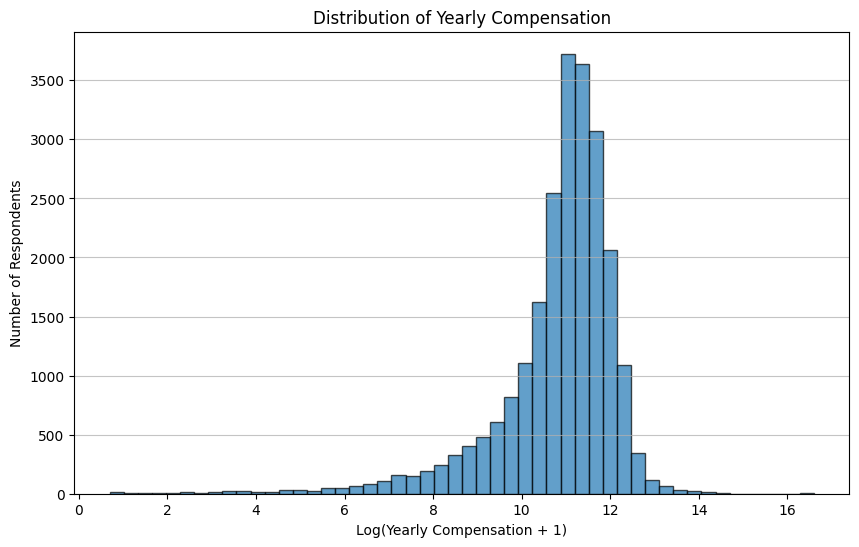

In [7]:
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df_cleaned = df.dropna(subset=['ConvertedCompYearly'])
df_cleaned = df_cleaned[df_cleaned['ConvertedCompYearly'] > 0.7]
#applying log technique to balance data as the data in the column has high amount of convertedcompyearly.
df_cleaned['LogConvertedCompYearly'] = np.log1p(df_cleaned['ConvertedCompYearly'])
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['LogConvertedCompYearly'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Log(Yearly Compensation + 1)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Insight
- The compensation data, when transformed logarithmically, shows a distribution that approximates a normal distribution, but with a clear skew. This suggests that the original, untransformed compensation data is highly right-skewed, meaning a large number of respondents earn lower salaries, and a smaller number earn very high salaries.

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



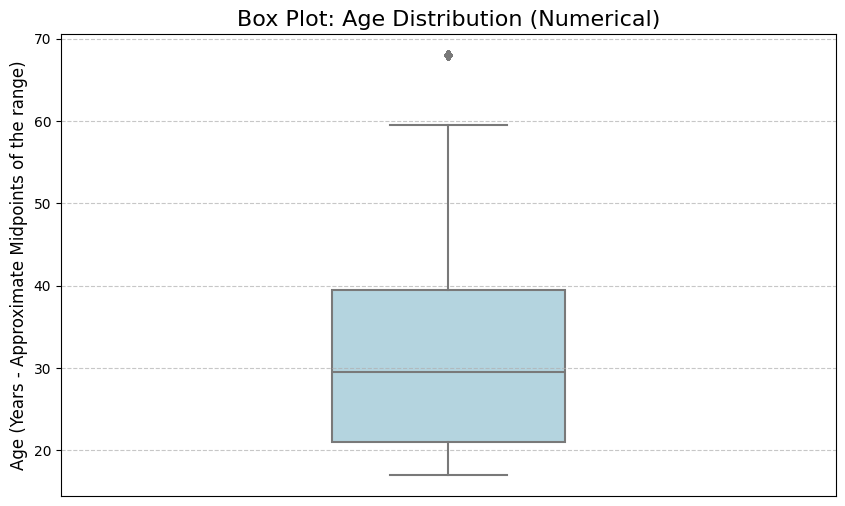

In [9]:
age_mapping = {
        'Under 18 years old': 17,    # Approximate midpoint of the ranges
        '18-24 years old': 21,       
        '25-34 years old': 29.5,     
        '35-44 years old': 39.5,     
        '45-54 years old': 49.5,     
        '55-64 years old': 59.5,     
        '65 years or older': 68     
    }
df['Age_numeric'] = df['Age'].map(age_mapping)
plot_df = df.dropna(subset=['Age_numeric']).copy()
plt.figure(figsize=(10, 6)) 
sns.boxplot(
            y=plot_df['Age_numeric'], 
            color='lightblue', 
            width=0.3, 
            linewidth=1.5, 
            fliersize=5 
        )
plt.title('Box Plot: Age Distribution (Numerical)', fontsize=16)
plt.ylabel('Age (Years - Approximate Midpoints of the range)', fontsize=12)
plt.xticks([])
plt.tick_params(axis='x', length=0) # Remove tick marks too
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines
plt.show()

### Insight
- The box plot clearly shows that the survey population is predominantly young to middle-aged. The median age is around 30, with the majority (middle 50%) of respondents falling between approximately 21 and 39.5 years old. While the data spans from under 18 to over 65, the distribution is heavily concentrated towards the younger end of the spectrum, with very few older outliers.
- There is one outlier visible at approximately 68 years old. This indicates a respondent whose age is significantly higher than the majority of the dataset.

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



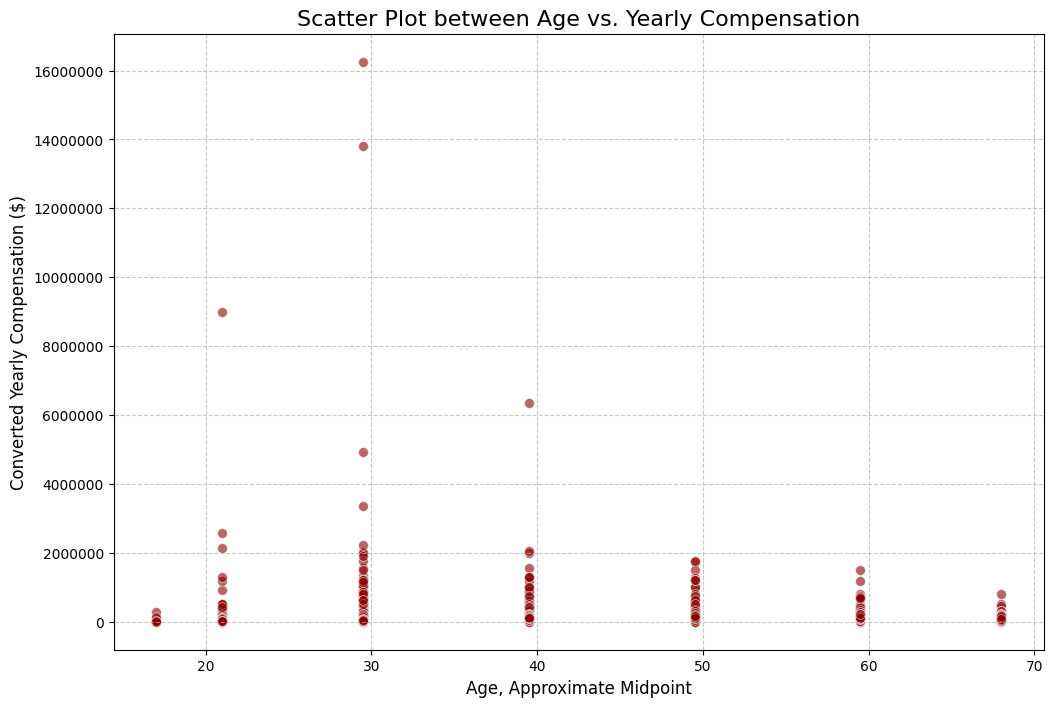

In [18]:
age_mapping = {
        'Under 18 years old': 17,
        '18-24 years old': 21,
        '25-34 years old': 29.5,
        '35-44 years old': 39.5,
        '45-54 years old': 49.5,
        '55-64 years old': 59.5,
        '65 years or older': 68
    }
df['Age_numeric'] = df['Age'].map(age_mapping)
df['ConvertedCompYearly_numeric'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
plot_df = df.dropna(subset=['Age_numeric', 'ConvertedCompYearly_numeric']).copy()
plt.figure(figsize=(12, 8)) 
sns.scatterplot(
            x='Age_numeric',
            y='ConvertedCompYearly_numeric',
            data=plot_df,
            alpha=0.6, 
            s=50, 
            color='darkred' 
        )
plt.title('Scatter Plot between Age vs. Yearly Compensation', fontsize=16)
plt.xlabel('Age, Approximate Midpoint', fontsize=12)
plt.ylabel('Converted Yearly Compensation ($)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y') 
plt.grid(True, linestyle='--', alpha=0.7) 
plt.show()

### Insight
- There is a general trend that as age increases, yearly compensation also tends to increase. The cluster of points generally shifts upwards as you move from left to right on the x-axis. However, there is extremely high variability in compensation within each age group.
- The majority of respondents, especially in younger to middle age groups (20s to 40s), appear to have compensation primarily below \\$2,000,000.
- While a general upward trend exists, the wide spread of compensation at every age, especially the presence of extreme outliers, means that age alone is not a perfect predictor of compensation. Many other factors (role, location, company, skills, negotiation) play a significant role.

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


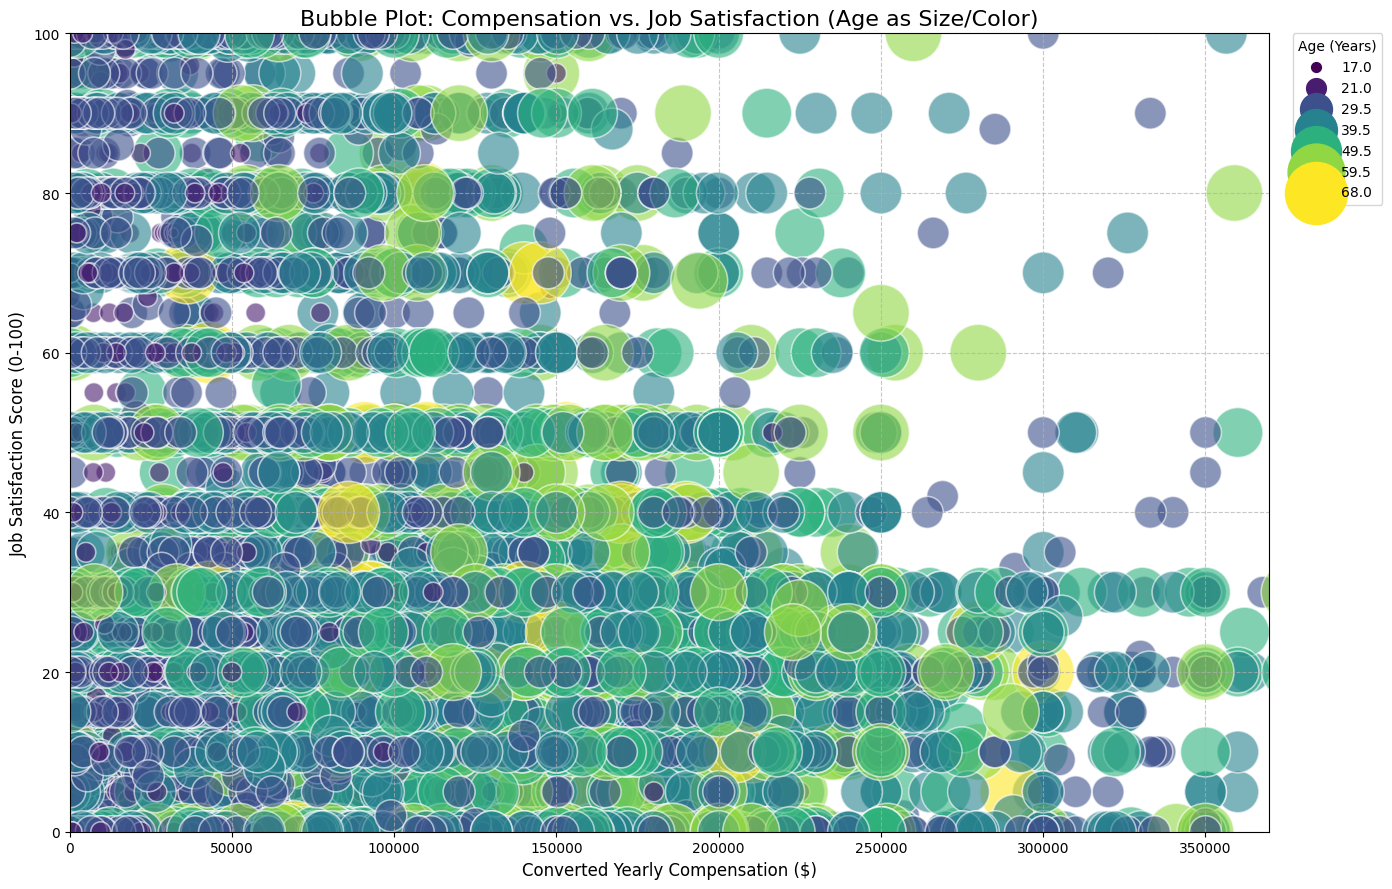

In [37]:
age_mapping = {
        'Under 18 years old': 17,
        '18-24 years old': 21,
        '25-34 years old': 29.5,
        '35-44 years old': 39.5,
        '45-54 years old': 49.5,
        '55-64 years old': 59.5,
        '65 years or older': 68
    }
df['Age_numeric'] = df['Age'].map(age_mapping)
df['ConvertedCompYearly_numeric'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6_numeric'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
plot_df = df.dropna(subset=['Age_numeric', 'ConvertedCompYearly_numeric', 'JobSatPoints_6_numeric']).copy()
y_max_limit = plot_df['ConvertedCompYearly_numeric'].quantile(0.99) #calculating 99% percentile for better readability. 
plt.figure(figsize=(14, 9)) 
sns.scatterplot(
            x='ConvertedCompYearly_numeric',
            y='JobSatPoints_6_numeric',
            size='Age_numeric', 
            hue='Age_numeric', 
            sizes=(50, 2000), 
            palette='viridis', 
            alpha=0.6, 
            data=plot_df,
            legend='full' 
        )
plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Age as Size/Color)', fontsize=16)
plt.xlabel('Converted Yearly Compensation ($)', fontsize=12)
plt.ylabel('Job Satisfaction Score (0-100)', fontsize=12)
plt.ticklabel_format(style='plain', axis='x') 
plt.xlim(0, y_max_limit)
plt.ylim(0, 100) 
plt.grid(True, linestyle='--', alpha=0.7) 
plt.legend(title='Age (Years)', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout(rect=[0, 0, 1, 1]) 
plt.show()

### Insight
- This plot visualizes the relationship between yearly compensation and job satisfaction, with the size and color of each bubble representing the approximate age of the respondent. The x-axis (compensation) has been limited to \\$350,000 to improve readability.
- Younger developers represented by smaller and darker bubbles, are primarily found in the lower compensation ranges. This is expected as they are earlier in their careers.
- As compensation increases, there is a noticeable shift towards larger, lighter (older) bubbles. This indicates that higher compensation is generally achieved by more experienced (and thus older) developers. This reinforces the trend seen in previous line charts.
- Job satisfaction appears to be distributed across the entire 0-10 scale for most compensation levels. There isn't a clear, strong linear correlation where higher compensation always means higher job satisfaction, or vice-versa.
- However, for higher compensation levels (e.g., above \\$200,000), the bubbles (which are predominantly larger/older) seem to be more spread out across the satisfaction scale, but with a slight tendency towards higher satisfaction scores. This might suggest that while high earners exist across all satisfaction levels, there might be a greater proportion of highly satisfied individuals among them.

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



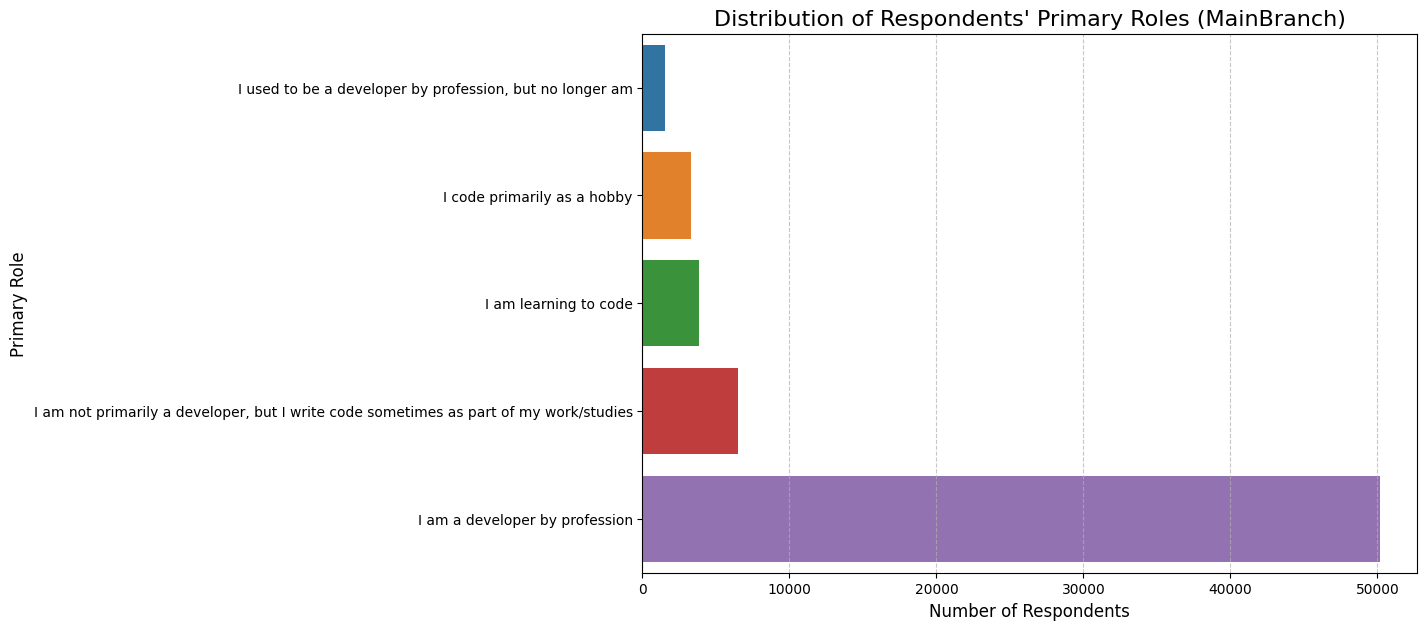

In [40]:
main_branch_data = df['MainBranch'].dropna()
main_branch_counts = main_branch_data.value_counts()
main_branch_counts = main_branch_counts.sort_values(ascending=True)
plt.figure(figsize=(10, 7)) 
sns.barplot(
            x=main_branch_counts.values,
            y=main_branch_counts.index,
        )
plt.title('Distribution of Respondents\' Primary Roles (MainBranch)', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Primary Role', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.show()


### Insight
- The overwhelming majority of respondents identify as "I am a developer by profession," with a count exceeding 50,000. This indicates that the survey primarily captures the perspectives of full-time, professional software developers.
- The second largest group is "I am not primarily a developer, but I write code sometimes as part of my work/studies," with a substantial number of respondents at around 7,000. This highlights the increasing prevalence of coding skills among professionals in other fields or students who use coding in their studies.
- The survey includes a notable segment of aspiring developers ('I am learning to code,' 5,000-6,000 respondents) and a strong community of coding enthusiasts ('I code primarily as a hobby,' 4,000-5,000 respondents). The smallest group comprises retired or former developers, which is expected given the survey's focus on active coding engagement.

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



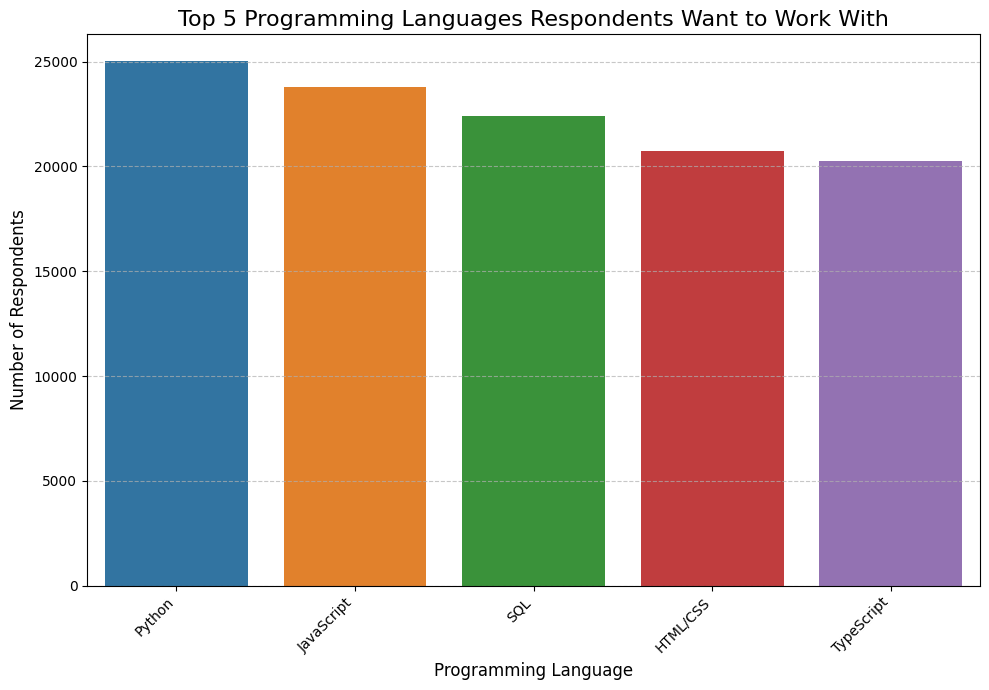

In [43]:
df['LanguageWantToWorkWith'] = df['LanguageWantToWorkWith'].fillna('')
df_exploded = df.assign(Language=df['LanguageWantToWorkWith'].str.split(';')).explode('Language')
df_exploded['Language'] = df_exploded['Language'].str.strip()
df_exploded = df_exploded[df_exploded['Language'] != ''] 
df_clean = df_exploded.dropna(subset=['Language']).copy()
language_counts = df_clean['Language'].value_counts()
top_5_languages = language_counts.head(5)
top_5_languages = top_5_languages.sort_values(ascending=False)
plt.figure(figsize=(10, 7)) 
sns.barplot(
            x=top_5_languages.index,
            y=top_5_languages.values,
        )
plt.title('Top 5 Programming Languages Respondents Want to Work With', fontsize=16)
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()

### Insight
- The top desired languages are a mix of general-purpose, highly versatile languages (Python, JavaScript) and core web/data technologies (SQL, HTML/CSS, TypeScript), indicating a strong interest in skills applicable to a wide range of modern development tasks.

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


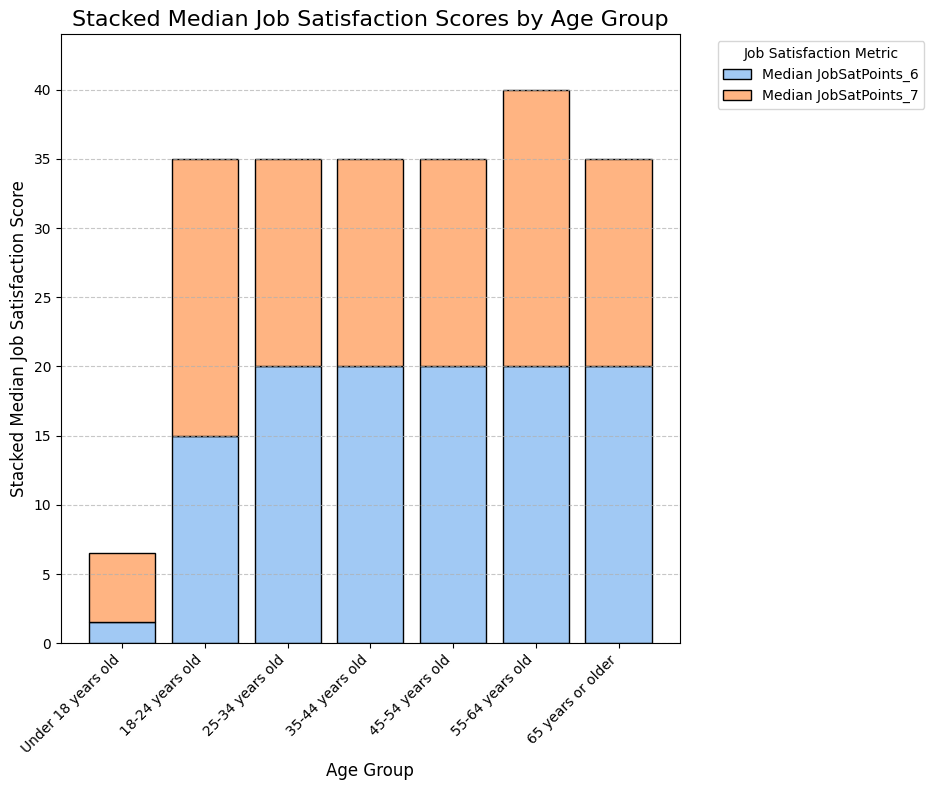

In [49]:
age_order_for_plot = [
        'Under 18 years old',
        '18-24 years old',
        '25-34 years old',
        '35-44 years old',
        '45-54 years old',
        '55-64 years old',
        '65 years or older'
    ]
df['Age'] = pd.Categorical(df['Age'], categories=age_order_for_plot, ordered=True)
df['JobSatPoints_6_numeric'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7_numeric'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')
plot_df = df.dropna(subset=['Age', 'JobSatPoints_6_numeric', 'JobSatPoints_7_numeric']).copy()
median_jobsat_by_age = plot_df.groupby('Age').agg(
            median_jobsat_6=('JobSatPoints_6_numeric', 'median'),
            median_jobsat_7=('JobSatPoints_7_numeric', 'median')
        ).reset_index()
plt.figure(figsize=(12, 8)) 
plt.bar(
            median_jobsat_by_age['Age'],
            median_jobsat_by_age['median_jobsat_6'],
            label='Median JobSatPoints_6',
            color=sns.color_palette('pastel')[0], 
            edgecolor='black'
        )
plt.bar(
            median_jobsat_by_age['Age'],
            median_jobsat_by_age['median_jobsat_7'],
            bottom=median_jobsat_by_age['median_jobsat_6'], 
            label='Median JobSatPoints_7',
            color=sns.color_palette('pastel')[1], 
            edgecolor='black'
        )
plt.title('Stacked Median Job Satisfaction Scores by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Stacked Median Job Satisfaction Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, median_jobsat_by_age[['median_jobsat_6', 'median_jobsat_7']].sum(axis=1).max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.legend(title='Job Satisfaction Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.8, 1]) 
plt.show()

### Interpret
- The stacked bar chart reveals that job satisfaction, as measured by JobSatPoints_6, remains fairly consistent across most age groups after an initial jump from the youngest cohort.
- However, JobSatPoints_7 contributes more variability, showing a general increase with age and peaking in the 55-64 years old range, leading this group to have the highest overall stacked median job satisfaction.
- The "Under 18 years old" group stands out with significantly lower satisfaction across both metrics.

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



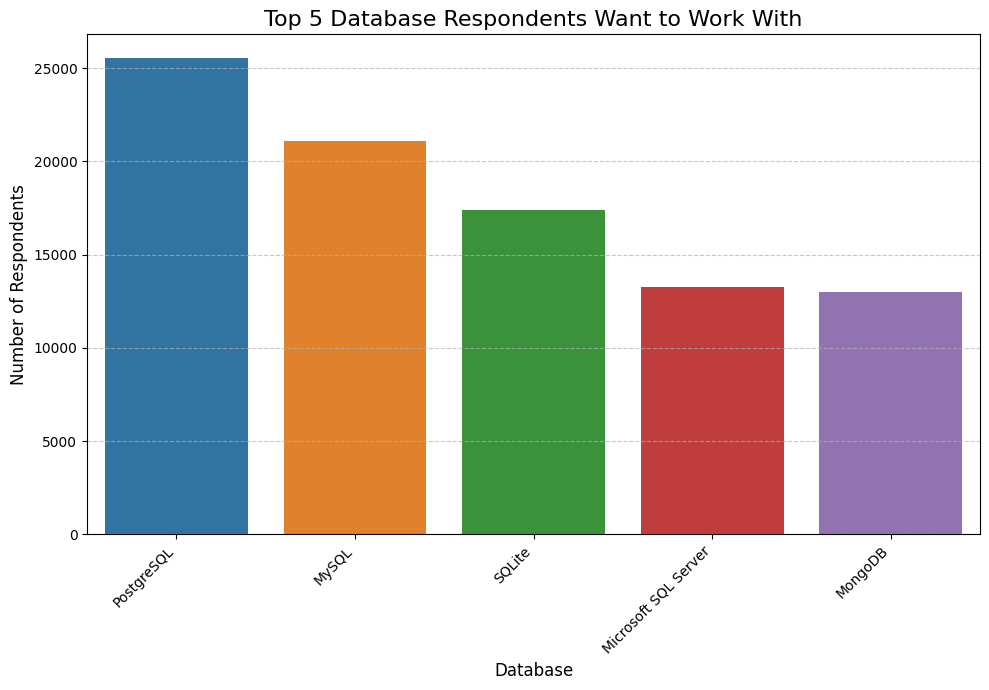

In [45]:
df['DatabaseHaveWorkedWith'] = df['DatabaseHaveWorkedWith'].fillna('')
df_exploded = df.assign(Database=df['DatabaseHaveWorkedWith'].str.split(';')).explode('Database')
df_exploded['Database'] = df_exploded['Database'].str.strip()
df_exploded = df_exploded[df_exploded['Database'] != ''] 
df_clean = df_exploded.dropna(subset=['Database']).copy()
db_counts = df_clean['Database'].value_counts()
top_5_db = db_counts.head(5)
top_5_db = top_5_db.sort_values(ascending=False)
plt.figure(figsize=(10, 7)) 
sns.barplot(
            x=top_5_db.index,
            y=top_5_db.values,
        )
plt.title('Top 5 Database Respondents Want to Work With', fontsize=16)
plt.xlabel('Database', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()

### Interpret
- The vertical bar chart clearly indicates that PostgreSQL is clearly the most desired database, with approximately 25,500 respondents wanting to work with it.
- MySQL comes in second, with around 21,000 respondents expressing interest. SQLite is the third most desired, with over 17,000 respondents.
- Microsoft SQL Server is desired by around 13,000 respondents, showing continued interest in Microsoft's enterprise-grade relational database.
- MongoDB, a leading NoSQL database, is desired by just over 12,500 respondents. Its document-oriented model appeals to developers working with flexible, unstructured data.

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



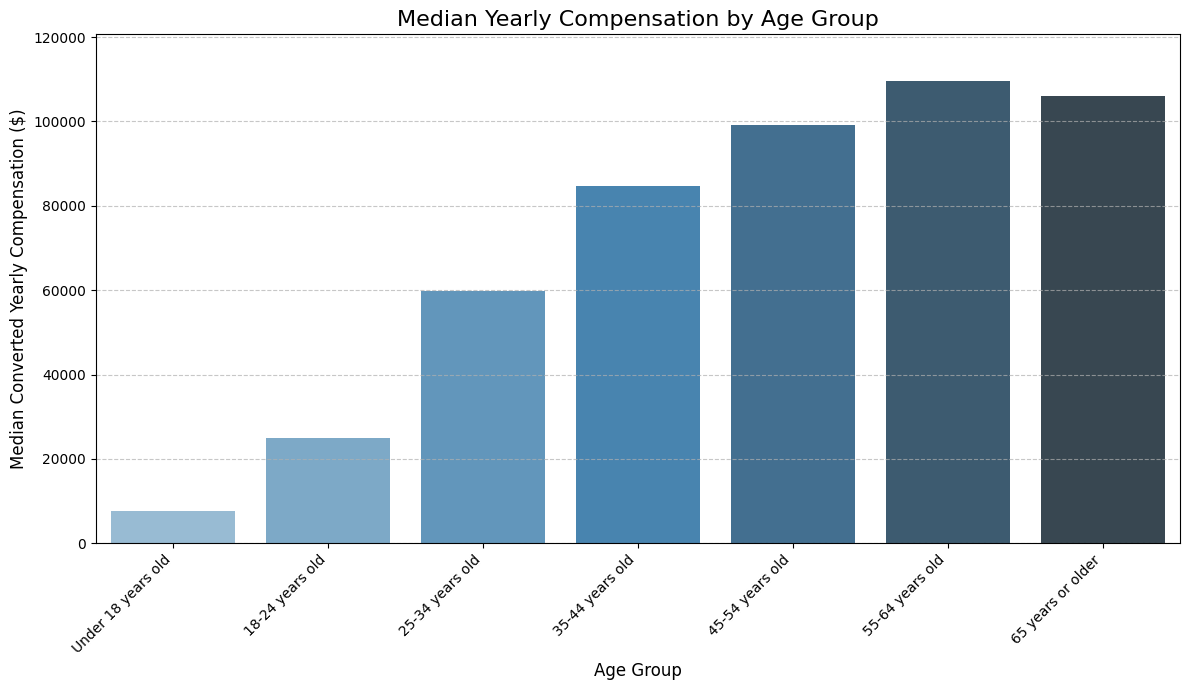

In [50]:
df['ConvertedCompYearly_numeric'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
age_order_for_plot = [
        'Under 18 years old',
        '18-24 years old',
        '25-34 years old',
        '35-44 years old',
        '45-54 years old',
        '55-64 years old',
        '65 years or older'
    ]
df['Age'] = pd.Categorical(df['Age'], categories=age_order_for_plot, ordered=True)
plot_df = df.dropna(subset=['Age', 'ConvertedCompYearly_numeric']).copy()
median_comp_by_age = plot_df.groupby('Age')['ConvertedCompYearly_numeric'].median().reset_index()
median_comp_by_age = median_comp_by_age.sort_values(by='Age')
plt.figure(figsize=(12, 7)) 
sns.barplot(
            x='Age',
            y='ConvertedCompYearly_numeric',
            data=median_comp_by_age,
            palette='Blues_d'
        )
plt.title('Median Yearly Compensation by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Converted Yearly Compensation ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y') 
max_y_val = median_comp_by_age['ConvertedCompYearly_numeric'].max()
plt.ylim(0, max_y_val * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()


### Insight
- There's a clear and consistent trend of increasing median yearly compensation as developers move into older age groups.
- The most substantial jumps in median compensation occur from "Under 18 years old" up through the "45-54 years old" age group. For example, compensation rises sharply from roughly \\$7,000 for "Under 18" to about \\$60,000 for "25-34 years old," and further to nearly \\$100,000 for "45-54 years old."
- Median compensation appears to peak in the "55-64 years old" age group, reaching its highest point (over \\$110,000).
- For the "65 years or older" group, the median compensation remains very high but shows a slight dip or plateau compared to the 55-64 age group.

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



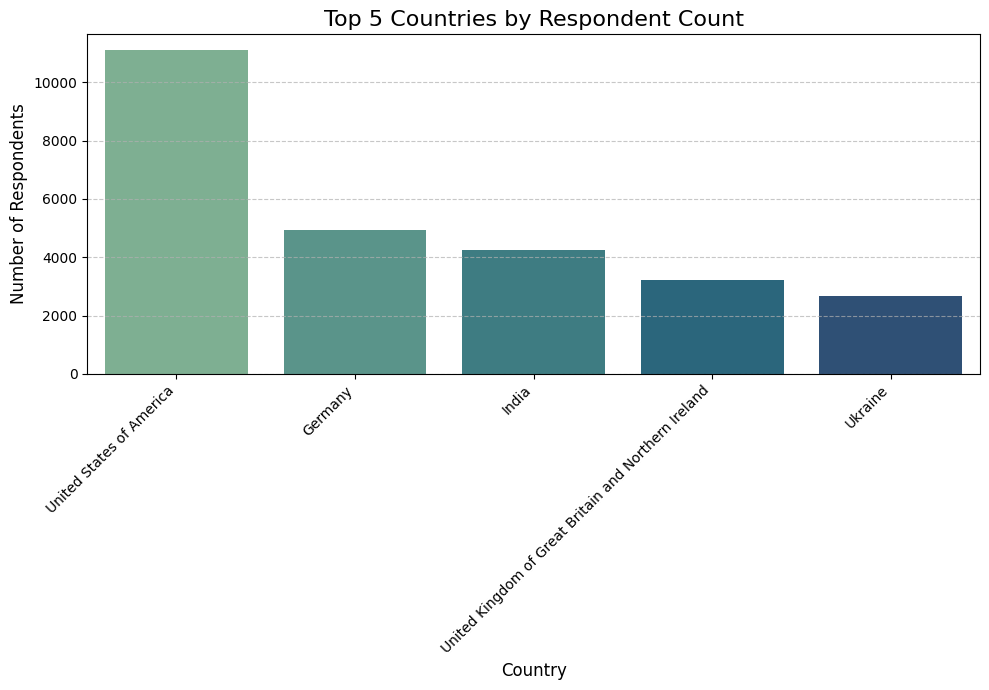

In [53]:
df['Country_Clean'] = df['Country'].fillna('')
cleaned_country_data = df[df['Country_Clean'] != ''].copy()
country_counts = cleaned_country_data['Country_Clean'].value_counts()
top_5_country = country_counts.head(5)
top_5_country = top_5_country.sort_values(ascending=False)
plt.figure(figsize=(10, 7))
sns.barplot(
            x=top_5_country.index, 
            y=top_5_country.values, 
            palette='crest' 
        )
plt.title('Top 5 Countries by Respondent Count', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

### Insight
The bar chart clearly shows that the United States of America has the highest number of survey respondents with over 10,000, significantly outpacing other countries. Germany with about 5000, India with around 4500, the United Kingdom with approx. 3200, and Ukraine with around 2800 complete the top five, indicating a strong survey presence across diverse global regions, particularly in North America, key European nations, and India.

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing us to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, we are be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## This work is done by Bimal Upadhaya © 2025